In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,20)

In [2]:
# load data
df = pd.read_excel('Melbourne_REM 2020-2022 copy.xlsx', sheet_name="Melbourne_REM 2020-2022", header=0, na_values='NAN')
df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford  16/11 Nicholson St      3    u        NaN     PI  Philip   
3  Abbotsford   49/84 Trenerry Cr      2    h   700000.0      S  Biggin   
4  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0 2020-02-04       2.5    3067.0  ...       2.0  1.0     265.0           NaN   
1 2020-02-04       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2 2020-04-16       2.5    3067.0  ...       2.0  2.0     200.0         129.0   
3 2020-04-23       2.5    3067.0  ...       1.0  1.0     387.0         286.0   
4 2020-05-07       2.5    3067.0  ...       2.0  2.0     277.0         210.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0     1988.0  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
1     1986.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
2     2010.0  Yarra City Council  -37.8093    144.9959  Northern Metropolitan   
3     2018.0  Yarra City Council       NaN         NaN  Northern Metropolitan   
4     2012.0  Yarra City Council  -37.8024    144.9993  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [3]:
df.shape

(34858, 21)

In [4]:
#note some suburbs only have 1 property
df.groupby('Suburb')['Suburb'].agg('count')

Suburb
Abbotsford      138
Aberfeldie       80
Airport West    162
Albanvale        14
Albert Park     131
               ... 
Yallambie        50
Yarra Glen        1
Yarraville      304
croydon           1
viewbank          1
Name: Suburb, Length: 351, dtype: int64

In [5]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
#drop unuseful columns
df1 = df.drop(['Address','SellerG','Distance','Postcode','Lattitude','Longtitude','Propertycount'],axis='columns')
df1.head()

Suburb  Rooms Type      Price Method       Date  Bedroom  Bathroom  \
0  Abbotsford      3    u        NaN     VB 2020-02-04        3       2.0   
1  Abbotsford      2    h  1035000.0      S 2020-02-04        2       1.0   
2  Abbotsford      3    u        NaN     PI 2020-04-16        3       2.0   
3  Abbotsford      2    h   700000.0      S 2020-04-23        1       1.0   
4  Abbotsford      3    h  1876000.0      S 2020-05-07        2       2.0   

   Car  Landsize  BuildingArea  YearBuilt         CouncilArea  \
0  1.0     265.0           NaN     1988.0  Yarra City Council   
1  0.0     156.0          79.0     1986.0  Yarra City Council   
2  2.0     200.0         129.0     2010.0  Yarra City Council   
3  1.0     387.0         286.0     2018.0  Yarra City Council   
4  2.0     277.0         210.0     2012.0  Yarra City Council   

              Regionname  
0  Northern Metropolitan  
1  Northern Metropolitan  
2  Northern Metropolitan  
3  Northern Metropolitan  
4  Northern Metropolitan

In [7]:
# find columns has nan values
df1.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7604
Method              0
Date                0
Bedroom             0
Bathroom            9
Car               511
Landsize         3599
BuildingArea    12841
YearBuilt        6771
CouncilArea         3
Regionname          3
dtype: int64

In [8]:
#note having more suburbs than CouncilArea and Regionname
#suburbs can be more useful to predicate housing prices
df1['Suburb'].nunique()

351

In [9]:
df1['CouncilArea'].nunique()

33

In [10]:
df1['Regionname'].nunique()

8

In [11]:
# since price is the target column, drop rows has n/a price value
# since bathroom, car, councilarea and regionname only have few nan value; drop rows with these nan is these columns
df2 = df1.dropna(subset=['Price','Bathroom','Car','CouncilArea','Regionname'])
df2.head()

Suburb  Rooms Type      Price Method       Date  Bedroom  Bathroom  \
1  Abbotsford      2    h  1035000.0      S 2020-02-04        2       1.0   
3  Abbotsford      2    h   700000.0      S 2020-04-23        1       1.0   
4  Abbotsford      3    h  1876000.0      S 2020-05-07        2       2.0   
5  Abbotsford      2    h   941000.0      S 2020-05-07        3       1.0   
6  Abbotsford      1    u   441000.0     SP 2020-05-14        3       3.0   

   Car  Landsize  BuildingArea  YearBuilt         CouncilArea  \
1  0.0     156.0          79.0     1986.0  Yarra City Council   
3  1.0     387.0         286.0     2018.0  Yarra City Council   
4  2.0     277.0         210.0     2012.0  Yarra City Council   
5  2.0     635.0           NaN     2010.0  Yarra City Council   
6  1.0     510.0           NaN     2015.0  Yarra City Council   

              Regionname  
1  Northern Metropolitan  
3  Northern Metropolitan  
4  Northern Metropolitan  
5  Northern Metropolitan  
6  Northern Metropolitan

In [12]:
# only Landsize, Buildingarea and YearBuilt have nan values
df2.isnull().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Date               0
Bedroom            0
Bathroom           0
Car                0
Landsize        2721
BuildingArea    9903
YearBuilt       5108
CouncilArea        0
Regionname         0
dtype: int64

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26868 entries, 1 to 34857
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Suburb        26868 non-null  object        
 1   Rooms         26868 non-null  int64         
 2   Type          26868 non-null  object        
 3   Price         26868 non-null  float64       
 4   Method        26868 non-null  object        
 5   Date          26868 non-null  datetime64[ns]
 6   Bedroom       26868 non-null  int64         
 7   Bathroom      26868 non-null  float64       
 8   Car           26868 non-null  float64       
 9   Landsize      24147 non-null  float64       
 10  BuildingArea  16965 non-null  float64       
 11  YearBuilt     21760 non-null  float64       
 12  CouncilArea   26868 non-null  object        
 13  Regionname    26868 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 3.1+ MB


In [14]:
# reset df2 index
df2.reset_index(drop=True, inplace=True)
df2.head()

Suburb  Rooms Type      Price Method       Date  Bedroom  Bathroom  \
0  Abbotsford      2    h  1035000.0      S 2020-02-04        2       1.0   
1  Abbotsford      2    h   700000.0      S 2020-04-23        1       1.0   
2  Abbotsford      3    h  1876000.0      S 2020-05-07        2       2.0   
3  Abbotsford      2    h   941000.0      S 2020-05-07        3       1.0   
4  Abbotsford      1    u   441000.0     SP 2020-05-14        3       3.0   

   Car  Landsize  BuildingArea  YearBuilt         CouncilArea  \
0  0.0     156.0          79.0     1986.0  Yarra City Council   
1  1.0     387.0         286.0     2018.0  Yarra City Council   
2  2.0     277.0         210.0     2012.0  Yarra City Council   
3  2.0     635.0           NaN     2010.0  Yarra City Council   
4  1.0     510.0           NaN     2015.0  Yarra City Council   

              Regionname  
0  Northern Metropolitan  
1  Northern Metropolitan  
2  Northern Metropolitan  
3  Northern Metropolitan  
4  Northern Metropolitan

In [15]:
# filling nan values of Landsize, BuildingArea and YearBuilt with their mean values of the Suburb area which the propery located at
df2[df2['Suburb']=='Doncaster']['BuildingArea'].mean()

248.63432835820896

In [16]:
# Calculate mean values of BuildingArea in each suburb
BuildingArea_Mean = {}
for name in df2['Suburb'].unique():
    BuildingArea_Mean.update({name:df2[df2['Suburb']==name]['BuildingArea'].mean()})

In [17]:
# Calculate mean values of Landsize in each suburb
Landsize_Mean = {}
for name in df2['Suburb'].unique():
    Landsize_Mean.update({name:df2[df2['Suburb']==name]['Landsize'].mean()})

In [18]:
# Calculate mean values of YearBuilt in each suburb
YearBuilt_Mean = {}
for name in df2['Suburb'].unique():
    YearBuilt_Mean.update({name:df2[df2['Suburb']==name]['YearBuilt'].mean()})

In [19]:
# fill nan of BuildingArea with its mean values of the Suburb it located at
for index, row in df2.iterrows():
    if pd.isnull(row['BuildingArea']):
        df2.iloc[index,10] = BuildingArea_Mean.get(df2.iloc[index,0])

/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
# fill nan of Landsize with its mean values of the Suburb it located at
for index, row in df2.iterrows():
    if pd.isnull(row['Landsize']):
        df2.iloc[index,9] = Landsize_Mean.get(df2.iloc[index,0])

In [21]:
# fill nan of YearBuilt with its mean values of the Suburb it located at
for index, row in df2.iterrows():
    if pd.isnull(row['YearBuilt']):
        df2.iloc[index,11] = YearBuilt_Mean.get(df2.iloc[index,0])

In [22]:
#note few couldn't be filled
df2.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Method          0
Date            0
Bedroom         0
Bathroom        0
Car             0
Landsize        3
BuildingArea    9
YearBuilt       6
CouncilArea     0
Regionname      0
dtype: int64

In [23]:
# clean up nan values
df2.dropna(inplace=True)

/Users/Hunter/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [24]:
# note no nan values
df2.isnull().sum()

Suburb          0
Rooms           0
Type            0
Price           0
Method          0
Date            0
Bedroom         0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64

In [25]:
# having 26858 down 8000 from 34858; 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26858 entries, 0 to 26867
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Suburb        26858 non-null  object        
 1   Rooms         26858 non-null  int64         
 2   Type          26858 non-null  object        
 3   Price         26858 non-null  float64       
 4   Method        26858 non-null  object        
 5   Date          26858 non-null  datetime64[ns]
 6   Bedroom       26858 non-null  int64         
 7   Bathroom      26858 non-null  float64       
 8   Car           26858 non-null  float64       
 9   Landsize      26858 non-null  float64       
 10  BuildingArea  26858 non-null  float64       
 11  YearBuilt     26858 non-null  float64       
 12  CouncilArea   26858 non-null  object        
 13  Regionname    26858 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(2), object(5)
memory usage: 3.1+ MB


In [26]:
# make a dataframe copy and add price_per_sqmt of the building area
df3 = df2.copy()
df3['price_per_sqmt']=df3['Price']/df3['BuildingArea']
df3.head()

Suburb  Rooms Type      Price Method       Date  Bedroom  Bathroom  \
0  Abbotsford      2    h  1035000.0      S 2020-02-04        2       1.0   
1  Abbotsford      2    h   700000.0      S 2020-04-23        1       1.0   
2  Abbotsford      3    h  1876000.0      S 2020-05-07        2       2.0   
3  Abbotsford      2    h   941000.0      S 2020-05-07        3       1.0   
4  Abbotsford      1    u   441000.0     SP 2020-05-14        3       3.0   

   Car  Landsize  BuildingArea  YearBuilt         CouncilArea  \
0  0.0     156.0      79.00000     1986.0  Yarra City Council   
1  1.0     387.0     286.00000     2018.0  Yarra City Council   
2  2.0     277.0     210.00000     2012.0  Yarra City Council   
3  2.0     635.0     171.90411     2010.0  Yarra City Council   
4  1.0     510.0     171.90411     2015.0  Yarra City Council   

              Regionname  price_per_sqmt  
0  Northern Metropolitan    13101.265823  
1  Northern Metropolitan     2447.552448  
2  Northern Metropolitan     8933.333333  
3  Northern Metropolitan     5473.981991  
4  Northern Metropolitan     2565.383696

In [27]:
#note some suburbs area only have one property
df3['Suburb'] = df3['Suburb'].apply(lambda x: x.strip( ))
Suburb_stats = df3.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False)
Suburb_stats

Suburb
Reservoir          727
Bentleigh East     493
Richmond           423
Preston            413
Brunswick          372
                  ... 
Lysterfield          1
Darley               1
Cranbourne East      1
Botanic Ridge        1
viewbank             1
Name: Suburb, Length: 335, dtype: int64

In [28]:
# 64 suburbs only have less than 10 properties
len(Suburb_stats[Suburb_stats<=10])

64

In [29]:
# we have 335 unique suburbs; it can be further narrowed down for analysis
len(Suburb_stats)

335

In [30]:
suburb_stats_less_than_10 = Suburb_stats[Suburb_stats<=10]

In [31]:
suburb_stats_less_than_10

Suburb
Coolaroo            10
Plumpton            10
Burnside Heights    10
St Helena           10
Hallam               9
                    ..
Lysterfield          1
Darley               1
Cranbourne East      1
Botanic Ridge        1
viewbank             1
Name: Suburb, Length: 64, dtype: int64

In [32]:
# mark suburbs with less than 10 properties as other_suburbs
# now we have 272 unique suburbs
df3.Suburb = df3.Suburb.apply(lambda x: 'other_suburbs' if x in suburb_stats_less_than_10 else x)
df3.Suburb.nunique()

272

In [33]:
df3.head()

Suburb  Rooms Type      Price Method       Date  Bedroom  Bathroom  \
0  Abbotsford      2    h  1035000.0      S 2020-02-04        2       1.0   
1  Abbotsford      2    h   700000.0      S 2020-04-23        1       1.0   
2  Abbotsford      3    h  1876000.0      S 2020-05-07        2       2.0   
3  Abbotsford      2    h   941000.0      S 2020-05-07        3       1.0   
4  Abbotsford      1    u   441000.0     SP 2020-05-14        3       3.0   

   Car  Landsize  BuildingArea  YearBuilt         CouncilArea  \
0  0.0     156.0      79.00000     1986.0  Yarra City Council   
1  1.0     387.0     286.00000     2018.0  Yarra City Council   
2  2.0     277.0     210.00000     2012.0  Yarra City Council   
3  2.0     635.0     171.90411     2010.0  Yarra City Council   
4  1.0     510.0     171.90411     2015.0  Yarra City Council   

              Regionname  price_per_sqmt  
0  Northern Metropolitan    13101.265823  
1  Northern Metropolitan     2447.552448  
2  Northern Metropolitan     8933.333333  
3  Northern Metropolitan     5473.981991  
4  Northern Metropolitan     2565.383696

In [34]:
# building area per beadroom is less than 30 square meters are considered outliers
df3[df3.BuildingArea/df3.Bedroom<30].head()

Suburb  Rooms Type      Price Method       Date  Bedroom  Bathroom  \
26     Abbotsford      2    h  1097000.0      S 2020-10-08        3       1.0   
45     Abbotsford      3    h  1290000.0      S 2021-02-25        3       2.0   
63     Abbotsford      2    u   505000.0     PI 2021-05-27        2       1.0   
155    Aberfeldie      4    h  1905000.0     SP 2021-10-21        4       2.0   
290  Airport West      3    h   845000.0      S 2021-10-28        3       3.0   

     Car  Landsize  BuildingArea  YearBuilt                 CouncilArea  \
26   2.0     220.0          75.0     2020.0          Yarra City Council   
45   2.0     147.0          18.0     1975.0          Yarra City Council   
63   1.0     345.0          38.0     1989.0          Yarra City Council   
155  2.0     797.0          26.0     1930.0  Moonee Valley City Council   
290  3.0     612.0          30.0     1970.0  Moonee Valley City Council   

                Regionname  price_per_sqmt  
26   Northern Metropolitan    14626.666667  
45   Northern Metropolitan    71666.666667  
63   Northern Metropolitan    13289.473684  
155   Western Metropolitan    73269.230769  
290   Western Metropolitan    28166.666667

In [35]:
# have 604 outliers
df3[df3.BuildingArea/df3.Bedroom<30].count()

Suburb            604
Rooms             604
Type              604
Price             604
Method            604
Date              604
Bedroom           604
Bathroom          604
Car               604
Landsize          604
BuildingArea      604
YearBuilt         604
CouncilArea       604
Regionname        604
price_per_sqmt    604
dtype: int64

In [36]:
df3.shape

(26858, 15)

In [37]:
# remove the 604 outliers and save as new dataframe
df4 = df3[~(df3.BuildingArea/df3.Bedroom<30)]
df4.shape

(26254, 15)

In [38]:
#note min and max of price_per_sqmt is far off from the mean and we need to remove these outliers
df4.price_per_sqmt.describe()

count    26254.000000
mean      5516.238723
std       3320.113340
min         30.439178
25%       3098.416268
50%       4812.500000
75%       7205.781628
max      76923.076923
Name: price_per_sqmt, dtype: float64

In [39]:
df4.groupby(['Suburb']).price_per_sqmt.mean()

Suburb
Abbotsford        7755.120298
Aberfeldie        6489.760452
Airport West      4025.608507
Albert Park      12997.574575
Albion            4136.695325
                     ...     
Wollert           2808.335981
Wyndham Vale      2166.382652
Yallambie         3845.119178
Yarraville        6502.602818
other_suburbs     3620.046486
Name: price_per_sqmt, Length: 272, dtype: float64

In [40]:
# assume the price_per_sqmt spreads in normal distribution; 68.3% of the data should be within the 1 std
def psqmt_outlier_remover(df):
    #create an empty df to save a final result
    df_result = pd.DataFrame()
    for key, subdf in df.groupby('Suburb'):
        #calculate mean and standard diviation of each suburb
        m = np.mean(subdf.price_per_sqmt)
        std = np.std(subdf.price_per_sqmt)
        # reduce dataframe to mean+-1std range which is 68%
        reduced_df = subdf[(subdf.price_per_sqmt>(m-std))&(subdf.price_per_sqmt<=(m+std))]
        # append the reduced dataframe to the empty df_result as the final dataframe
        df_result = pd.concat([df_result, reduced_df],ignore_index=True)
    return df_result

In [41]:
df5 = psqmt_outlier_remover(df4)

In [42]:
df5.shape

(17709, 15)

In [43]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17709 entries, 0 to 17708
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Suburb          17709 non-null  object        
 1   Rooms           17709 non-null  int64         
 2   Type            17709 non-null  object        
 3   Price           17709 non-null  float64       
 4   Method          17709 non-null  object        
 5   Date            17709 non-null  datetime64[ns]
 6   Bedroom         17709 non-null  int64         
 7   Bathroom        17709 non-null  float64       
 8   Car             17709 non-null  float64       
 9   Landsize        17709 non-null  float64       
 10  BuildingArea    17709 non-null  float64       
 11  YearBuilt       17709 non-null  float64       
 12  CouncilArea     17709 non-null  object        
 13  Regionname      17709 non-null  object        
 14  price_per_sqmt  17709 non-null  float64       
dtypes:

In [44]:
df5.Rooms.unique()

array([2, 3, 1, 4, 5, 6])

In [45]:
df5.Bedroom.unique()

array([2, 1, 3, 4, 5, 6])

In [46]:
df5.Bathroom.unique()
# note some houses has 0 bathroom

array([1., 2., 3., 4., 0., 5., 6.])

In [47]:
df5[df5.Bathroom==0]['Bathroom'].count()
# 18 houses without bathroom are considered as outliers and needed to be removed

18

In [48]:
#remove houses with 0 bathroom and save as df6
df6 = df5[df5.Bathroom!=0]
df6.shape

(17691, 15)

In [49]:
import seaborn as sns

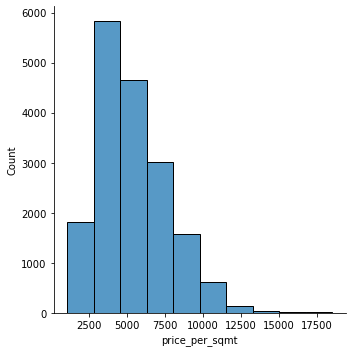

In [50]:
sns.displot(df6['price_per_sqmt'], kde=False, bins=10)
#note price_per_sqmt is in normal distribution curve
#most houses are sold between 2500-7500 price_per_sqmt

<AxesSubplot:xlabel='Date', ylabel='price_per_sqmt'>

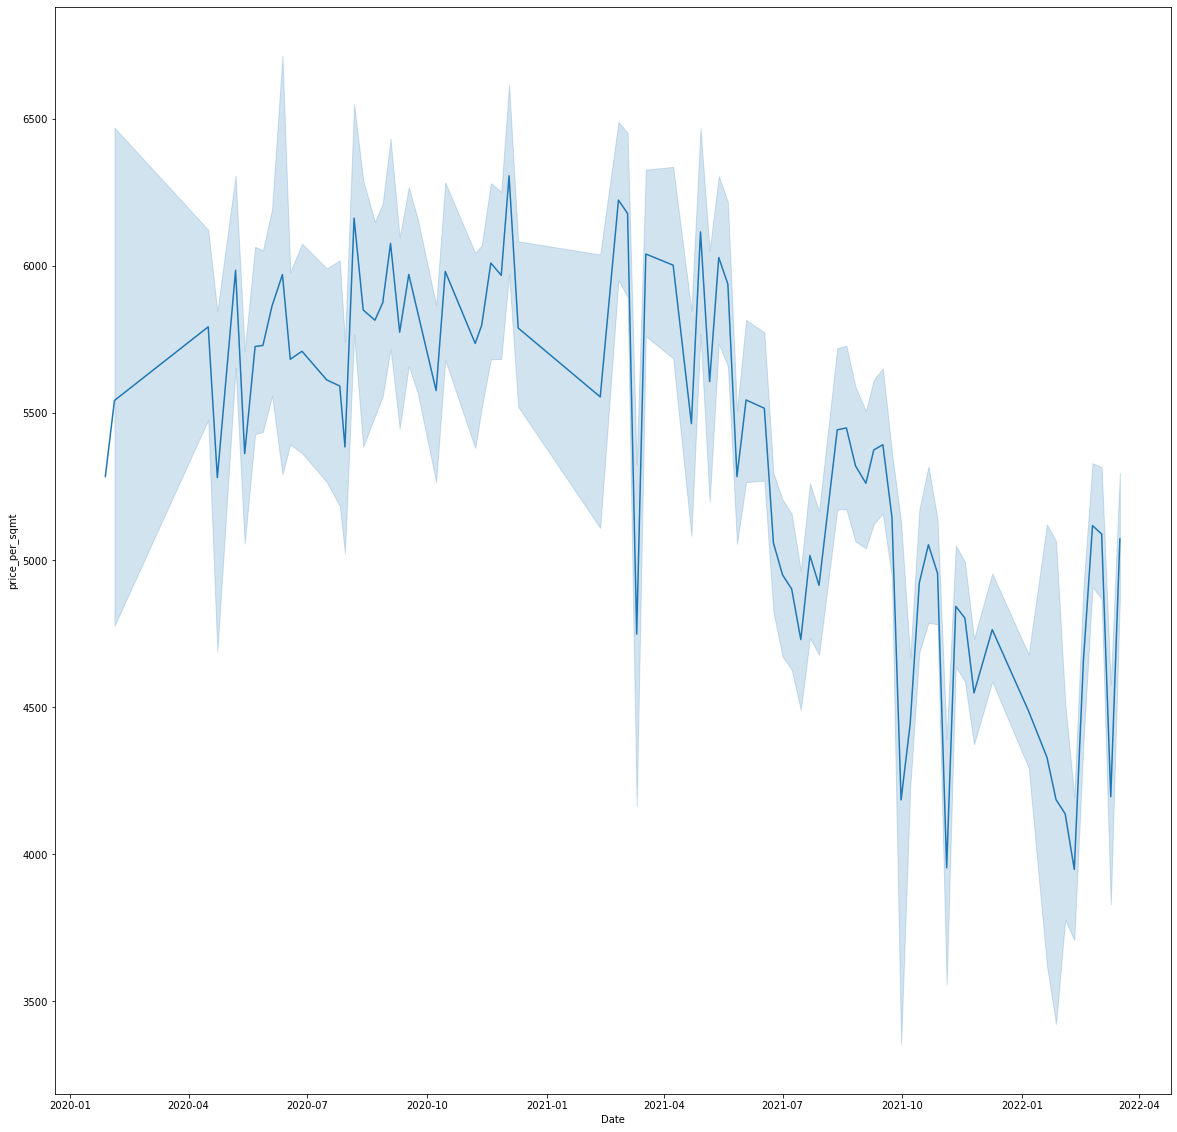

In [51]:
sns.lineplot(data=df6, x='Date', y='price_per_sqmt')
# notice price per sqmt is generally in a slight down trend from 2021 to 2022

In [52]:
df6['Year_Month'] = df6['Date'].dt.to_period('M')
df6['Year_Month']

/var/folders/y_/b1xz3d2n5hvfp09xy7b4qgyc0000gn/T/ipykernel_62190/4062234871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Year_Month'] = df6['Date'].dt.to_period('M')


0        2020-02
1        2020-04
2        2020-05
3        2020-05
4        2020-05
          ...   
17704    2021-11
17705    2022-01
17706    2022-02
17707    2021-08
17708    2021-07
Name: Year_Month, Length: 17691, dtype: period[M]

In [53]:
df6.groupby('Year_Month')['Price'].agg('mean')

Year_Month
2020-01    1.205000e+06
2020-02    8.423482e+05
2020-04    1.034205e+06
2020-05    1.116960e+06
2020-06    1.071220e+06
2020-07    9.700331e+05
2020-08    1.072315e+06
2020-09    1.091582e+06
2020-10    1.044994e+06
2020-11    1.111934e+06
2020-12    1.144014e+06
2021-02    1.104153e+06
2021-03    1.127419e+06
2021-04    1.034410e+06
2021-05    1.112746e+06
2021-06    1.092600e+06
2021-07    8.920685e+05
2021-08    1.077708e+06
2021-09    1.044615e+06
2021-10    1.052219e+06
2021-11    1.107719e+06
2021-12    1.012568e+06
2022-01    9.509739e+05
2022-02    1.001722e+06
2022-03    1.084192e+06
Freq: M, Name: Price, dtype: float64

<AxesSubplot:xlabel='Year_Month'>

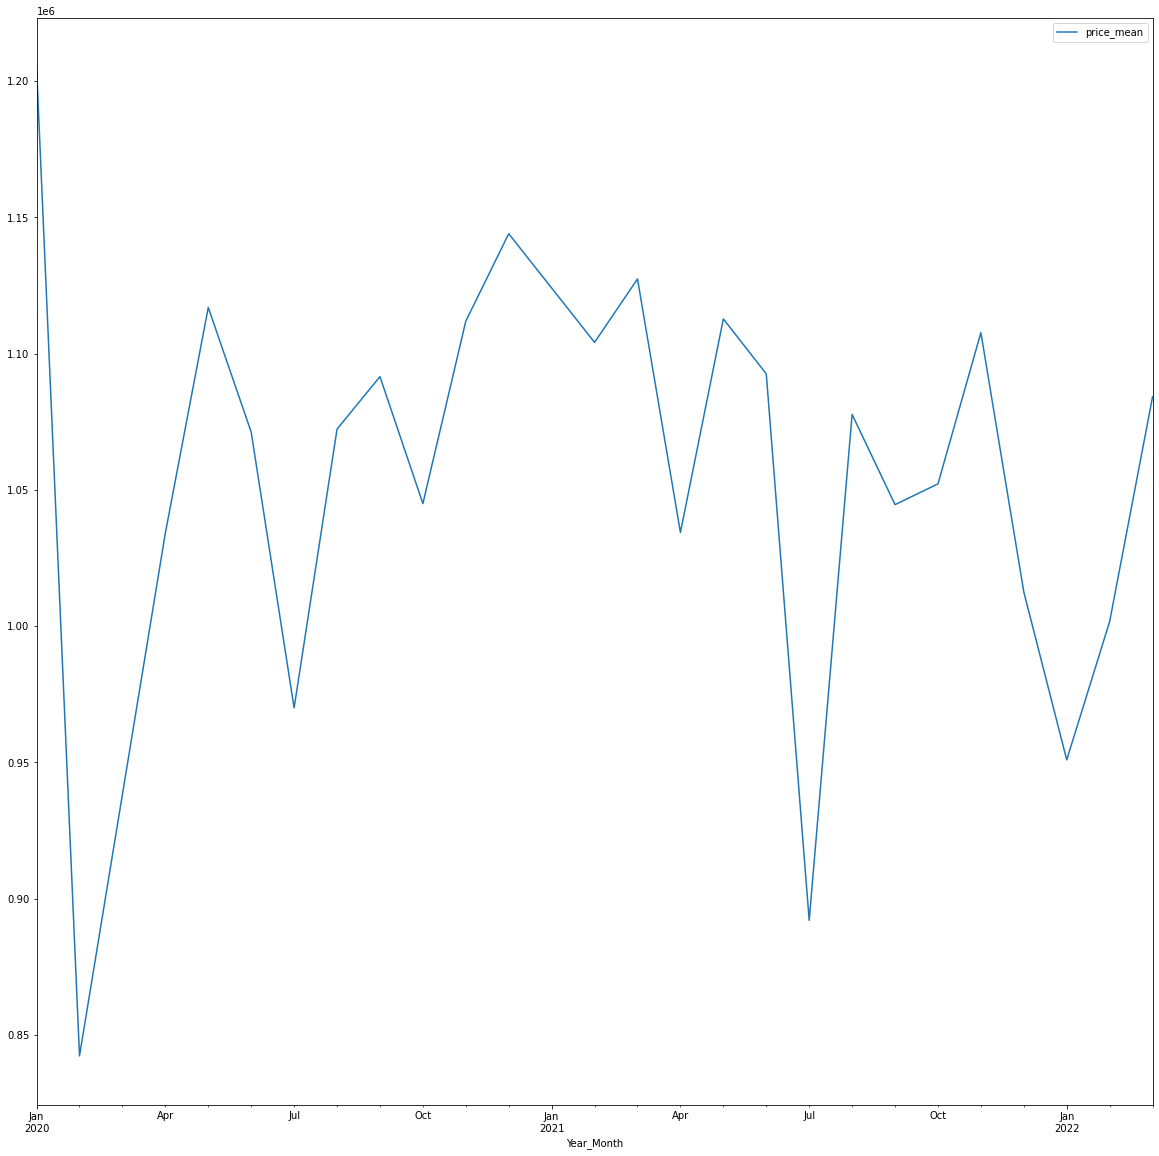

In [54]:
df_tmp = df6.groupby('Year_Month').agg(price_mean=pd.NamedAgg(column='Price',aggfunc='mean'))
df_tmp.plot()

<AxesSubplot:xlabel='Year_Month'>

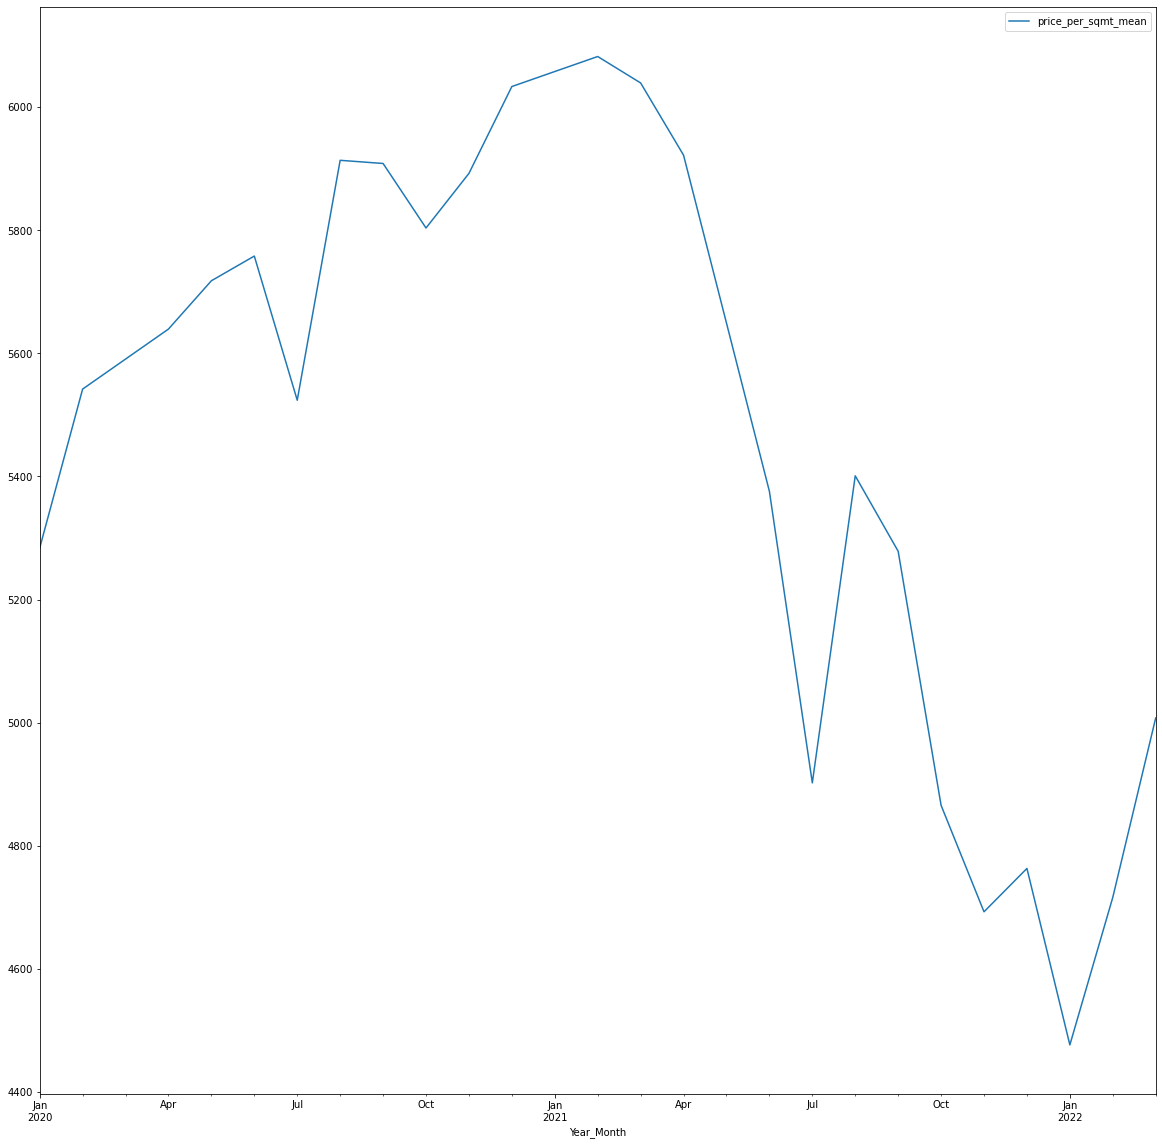

In [55]:
df_tmp2 = df6.groupby('Year_Month').agg(price_per_sqmt_mean = pd.NamedAgg(column='price_per_sqmt',aggfunc='mean'))
df_tmp2.plot()

In [56]:
df6.describe()

Rooms         Price       Bedroom      Bathroom           Car  \
count  17691.000000  1.769100e+04  17691.000000  17691.000000  17691.000000   
mean       3.080945  1.059415e+06      2.937878      1.641908      1.677011   
std        0.880737  5.492266e+05      0.937888      0.707726      0.923239   
min        1.000000  1.850000e+05      1.000000      1.000000      0.000000   
25%        3.000000  6.760000e+05      2.000000      1.000000      1.000000   
50%        3.000000  9.100000e+05      3.000000      2.000000      2.000000   
75%        4.000000  1.305000e+06      4.000000      2.000000      2.000000   
max        6.000000  5.770000e+06      6.000000      6.000000     18.000000   

            Landsize  BuildingArea     YearBuilt  price_per_sqmt  
count   17691.000000  17691.000000  17691.000000    17691.000000  
mean      568.624532    207.461884   1991.210229     5365.847794  
std      1688.079166     76.028461     19.126791     2283.164818  
min       100.000000     30.000000   1857.000000     1071.917808  
25%       336.000000    167.000000   1983.033333     3592.783453  
50%       479.000000    202.888889   1991.888889     4957.688338  
75%       626.544554    244.795918   2004.000000     6771.870850  
max    146699.000000    857.000000   2020.000000    18495.575221

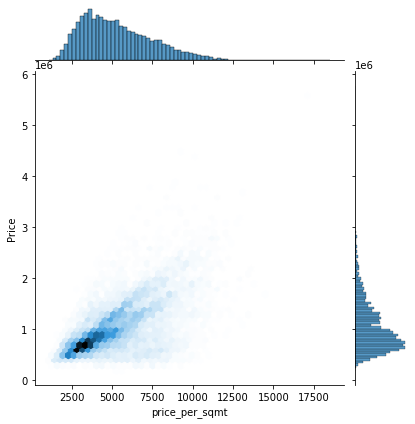

In [57]:
sns.jointplot(x='price_per_sqmt',y='Price',data=df6, kind='hex')
#note most houses were sold in range of $0.5-1.5 million

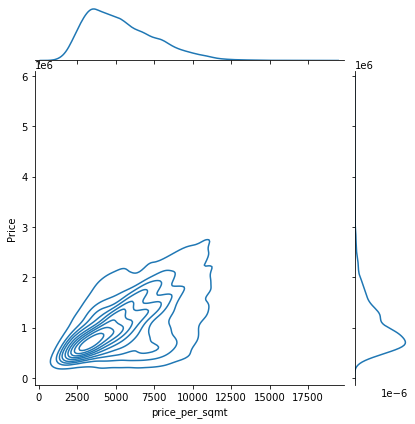

In [58]:
sns.jointplot(x='price_per_sqmt',y='Price',data=df6, kind='kde')

In [59]:
df6.Regionname.nunique()

8

In [60]:
df6.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False).head(5)
#top 5 Suburb with most property sales

Suburb
Reservoir         496
Bentleigh East    342
Richmond          254
Preston           251
St Kilda          243
Name: Suburb, dtype: int64

In [61]:
df6.groupby('Suburb')['Price'].agg('mean').sort_values(ascending=False).head(5)
#top 5 Suburb with highest average price

Suburb
Canterbury     2.358078e+06
Middle Park    2.193455e+06
Malvern        2.123054e+06
Brighton       1.965034e+06
Camberwell     1.916892e+06
Name: Price, dtype: float64

In [62]:
df6.groupby('Suburb')['price_per_sqmt'].mean().sort_values(ascending=False).head(10)

Suburb
Albert Park        12904.994939
Middle Park        12757.230866
Canterbury          9337.397486
Malvern             8960.931254
Burnley             8912.639229
Travancore          8365.951419
Fitzroy             8338.753530
Brighton            8283.291786
South Melbourne     7947.807723
Hawthorn East       7886.267933
Name: price_per_sqmt, dtype: float64

In [63]:
import plotly.express as px

In [64]:
px.box(df6,y='price_per_sqmt',color='Regionname',hover_name='Regionname')

In [65]:
px.box(df6.loc[df6['Suburb'].isin(['Albert Park','Middle Park','Canterbury','Malvern','Burnley','Travancore','Fitzroy','Brighton','South Melbourne','Hawthorn East'])],
       y='price_per_sqmt',
       x='Suburb',
      color='Suburb',
      hover_name='Suburb',
      category_orders={'Suburb':['Albert Park','Middle Park','Canterbury','Malvern','Burnley','Travancore','Fitzroy','Brighton','South Melbourne','Hawthorn East']})

In [66]:
df6.Type.unique()

array(['h', 'u', 't'], dtype=object)

In [67]:
df_tmp3=df6.groupby('Type')['Type'].count()

In [68]:
px.bar(df_tmp3)
# house is still the most popular type of property 

In [69]:
df6.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Date', 'Bedroom',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'price_per_sqmt', 'Year_Month'],
      dtype='object')

In [70]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17691 entries, 0 to 17708
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Suburb          17691 non-null  object        
 1   Rooms           17691 non-null  int64         
 2   Type            17691 non-null  object        
 3   Price           17691 non-null  float64       
 4   Method          17691 non-null  object        
 5   Date            17691 non-null  datetime64[ns]
 6   Bedroom         17691 non-null  int64         
 7   Bathroom        17691 non-null  float64       
 8   Car             17691 non-null  float64       
 9   Landsize        17691 non-null  float64       
 10  BuildingArea    17691 non-null  float64       
 11  YearBuilt       17691 non-null  float64       
 12  CouncilArea     17691 non-null  object        
 13  Regionname      17691 non-null  object        
 14  price_per_sqmt  17691 non-null  float64       
 15  Ye

In [71]:
df6

Suburb  Rooms Type      Price Method       Date  Bedroom  \
0         Abbotsford      2    h  1035000.0      S 2020-02-04        2   
1         Abbotsford      2    h   700000.0      S 2020-04-23        1   
2         Abbotsford      3    h  1876000.0      S 2020-05-07        2   
3         Abbotsford      2    h   941000.0      S 2020-05-07        3   
4         Abbotsford      1    u   441000.0     SP 2020-05-14        3   
...              ...    ...  ...        ...    ...        ...      ...   
17704  other_suburbs      4    h   850000.0     SP 2021-11-11        4   
17705  other_suburbs      4    h   785000.0      S 2022-01-06        4   
17706  other_suburbs      3    t   475000.0      S 2022-02-10        3   
17707  other_suburbs      3    h   900000.0     VB 2021-08-12        3   
17708  other_suburbs      3    h   620000.0     SP 2021-07-22        3   

       Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
0           1.0  0.0     156.0      79.00000     1986.0   
1           1.0  1.0     387.0     286.00000     2018.0   
2           2.0  2.0     277.0     210.00000     2012.0   
3           1.0  2.0     635.0     171.90411     2010.0   
4           3.0  1.0     510.0     171.90411     2015.0   
...         ...  ...       ...           ...        ...   
17704       2.0  2.0     672.0     274.00000     2010.0   
17705       2.0  2.0     448.0     248.00000     2013.0   
17706       2.0  2.0     222.0     149.00000     2008.8   
17707       2.0  2.0     440.0     177.00000     1910.0   
17708       2.0  1.0     863.0     180.56000     1975.0   

                      CouncilArea             Regionname  price_per_sqmt  \
0              Yarra City Council  Northern Metropolitan    13101.265823   
1              Yarra City Council  Northern Metropolitan     2447.552448   
2              Yarra City Council  Northern Metropolitan     8933.333333   
3              Yarra City Council  Northern Metropolitan     5473.981991   
4              Yarra City Council  Northern Metropolitan     2565.383696   
...                           ...                    ...             ...   
17704        Wyndham City Council   Western Metropolitan     3102.189781   
17705        Wyndham City Council   Western Metropolitan     3165.322581   
17706        Wyndham City Council   Western Metropolitan     3187.919463   
17707     Manningham City Council       Eastern Victoria     5084.745763   
17708  Yarra Ranges Shire Council      Northern Victoria     3433.761630   

      Year_Month  
0        2020-02  
1        2020-04  
2        2020-05  
3        2020-05  
4        2020-05  
...          ...  
17704    2021-11  
17705    2022-01  
17706    2022-02  
17707    2021-08  
17708    2021-07  

[17691 rows x 16 columns]

In [72]:
df_tmp4 = df6.copy()
df_tmp4.set_index('Suburb',inplace=True)

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

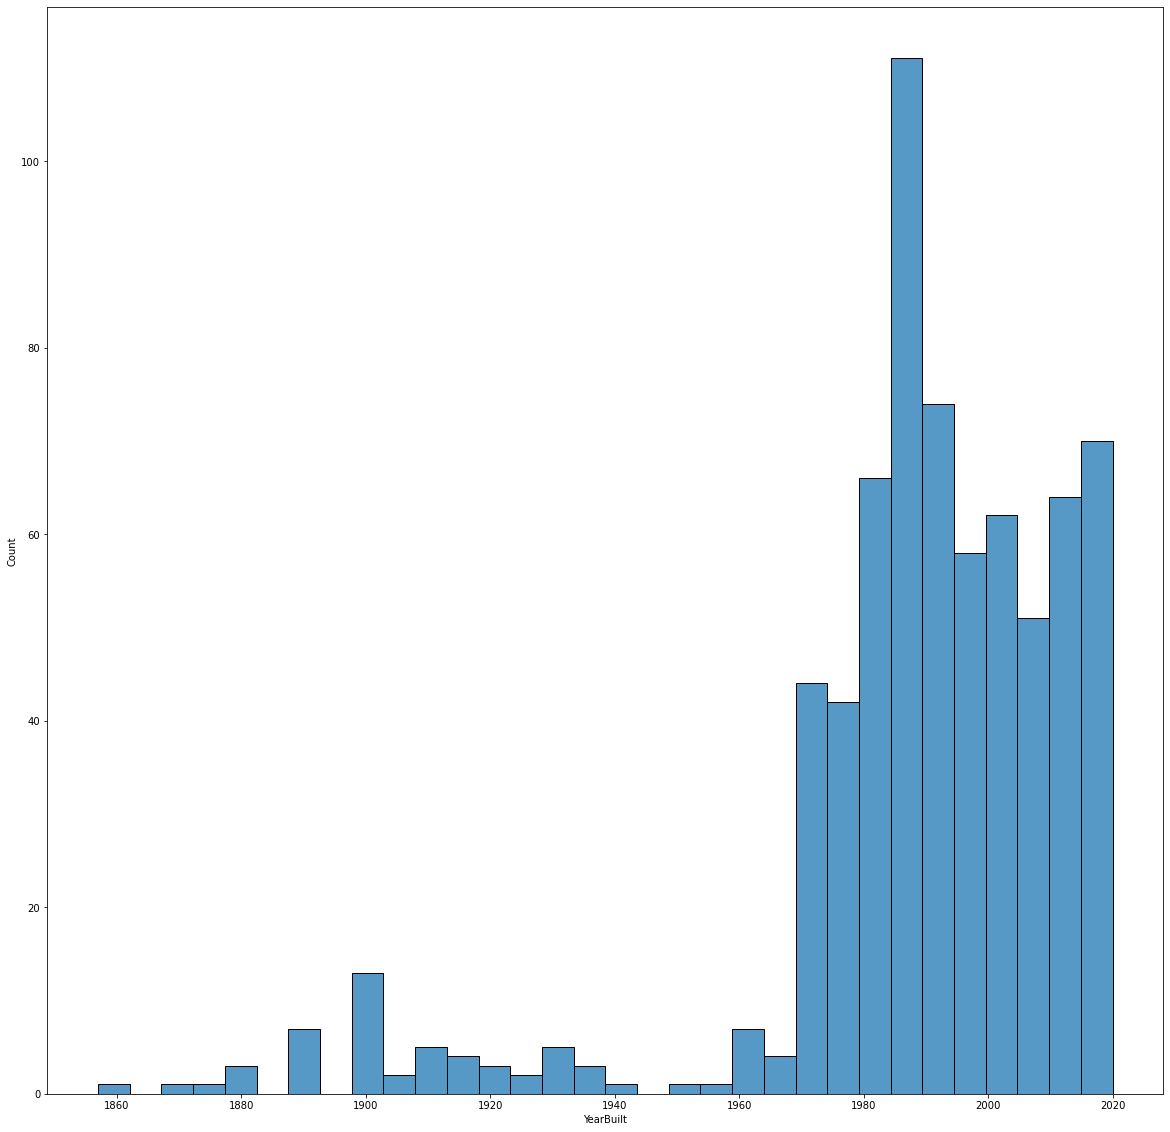

In [73]:
top_suburbs= ['Albert Park','Middle Park','Canterbury','Malvern','Burnley','Travancore','Fitzroy','Brighton','South Melbourne','Hawthorn East']
df_tmp5 = df_tmp4.loc[top_suburbs]
sns.histplot(data=df_tmp5['YearBuilt'])
# note: most houses sold were built between 1980-2000

In [74]:
df_tmp6 = df_tmp5.loc[:,['Type','BuildingArea','price_per_sqmt','YearBuilt']]
df_tmp6.reset_index(inplace=True)
df_tmp6

Suburb Type  BuildingArea  price_per_sqmt  YearBuilt
0      Albert Park    h    147.000000    13605.442177     1900.0
1      Albert Park    h    123.000000    17073.170732     1985.0
2      Albert Park    h    180.000000    12777.777778     2001.0
3      Albert Park    h    156.779070     9886.523771     1984.0
4      Albert Park    h    254.000000    11023.622047     2008.0
..             ...  ...           ...             ...        ...
701  Hawthorn East    t    181.000000     8784.530387     2015.0
702  Hawthorn East    u     64.000000     8671.875000     2004.0
703  Hawthorn East    h    200.220339     8066.113604     1995.0
704  Hawthorn East    h    200.220339     5693.727250     2015.0
705  Hawthorn East    h    113.000000    12256.637168     2015.0

[706 rows x 5 columns]

<AxesSubplot:xlabel='Suburb', ylabel='BuildingArea'>

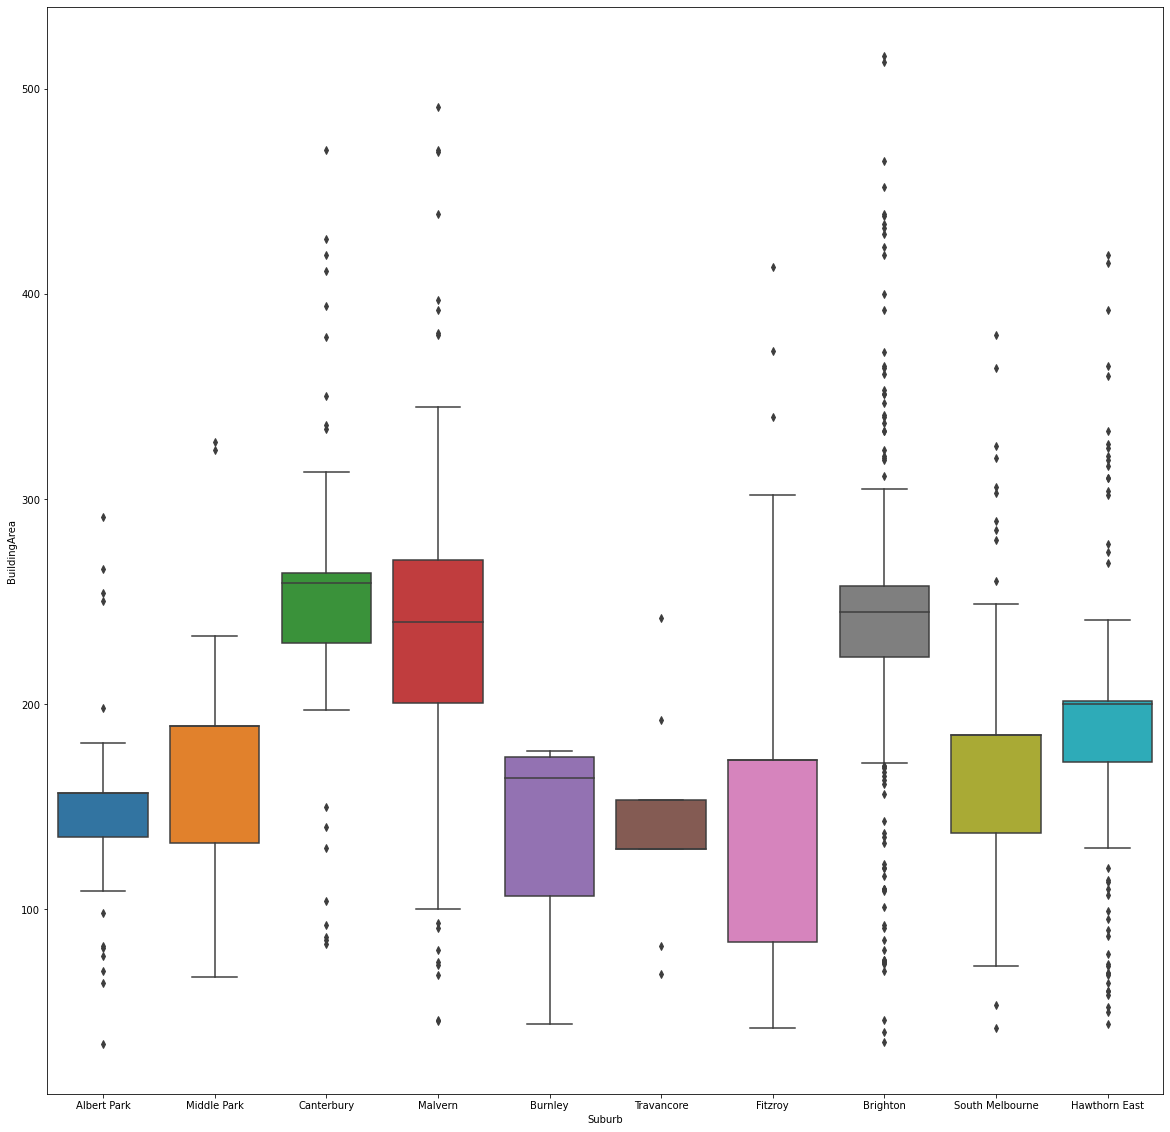

In [75]:
sns.boxplot(x='Suburb',y='BuildingArea',data=df_tmp6)
#note Canterbury, Malvem and Brington have more houses, greater than 200sqmt, sold between 2021-2022

<AxesSubplot:xlabel='price_per_sqmt', ylabel='Count'>

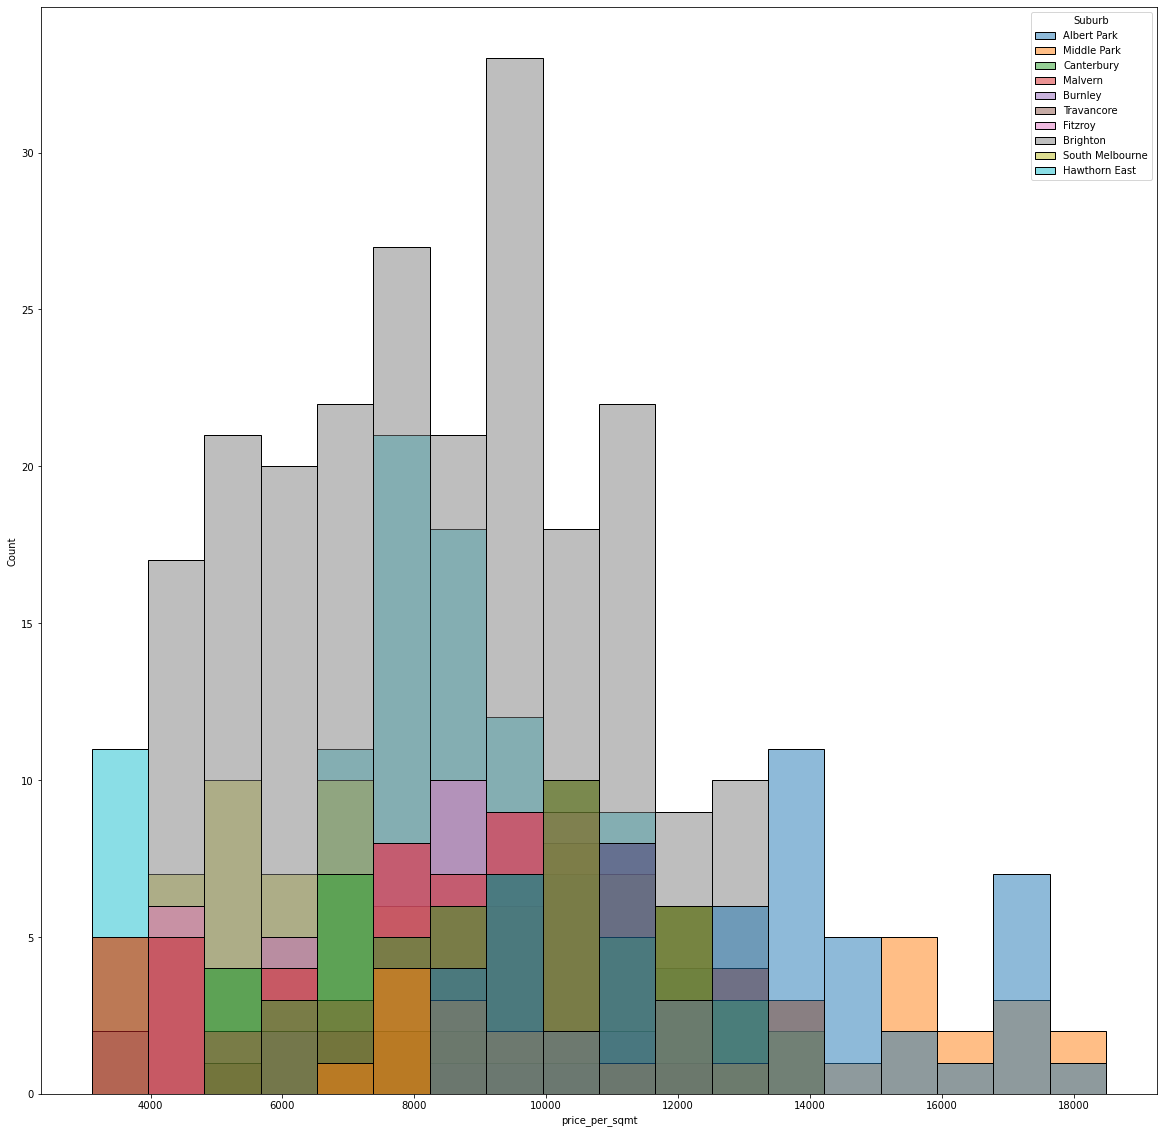

In [76]:
sns.histplot(data=df_tmp6, x='price_per_sqmt', hue='Suburb')

<AxesSubplot:xlabel='price_per_sqmt', ylabel='Count'>

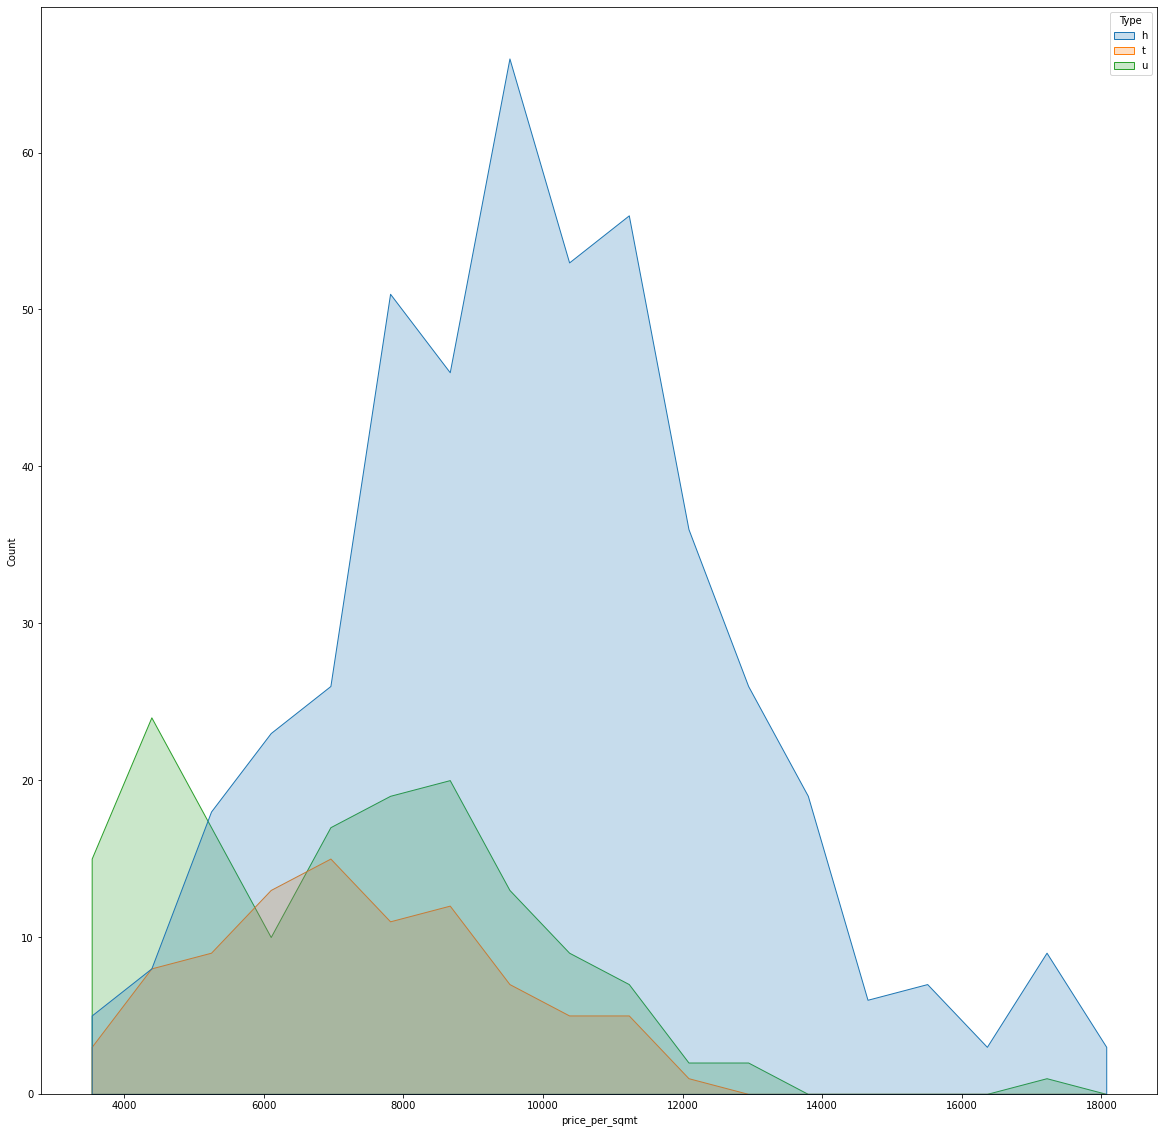

In [77]:
sns.histplot(data=df_tmp6, x='price_per_sqmt',hue='Type',element='poly')

In [78]:
px.histogram(df_tmp6, x='price_per_sqmt', color='Suburb')
#most properties were sold between $5,000-$11,000 per sqmt
#properties in Middle Park and Albert Park suburbs were clear outliers as most of them were sold at higher price per sqmt (10k-18k)
#properties in Fitzory au Brighton, South Melbourne and Hawthon East were sold closed to mean price range (6k-11k per sqmt)

In [79]:
px.histogram(df_tmp6, x='price_per_sqmt', color='Type')
# most townhouses were sold at $5k-10k sqmt, mean price greater than townhouse and unit/duplex
# most houses were sold at $6k-14k sqmt and has wider spread in price range
# most unit/duplex were sold at $4k-10k range, mean price lower than townhouse

<AxesSubplot:xlabel='Date', ylabel='price_per_sqmt'>

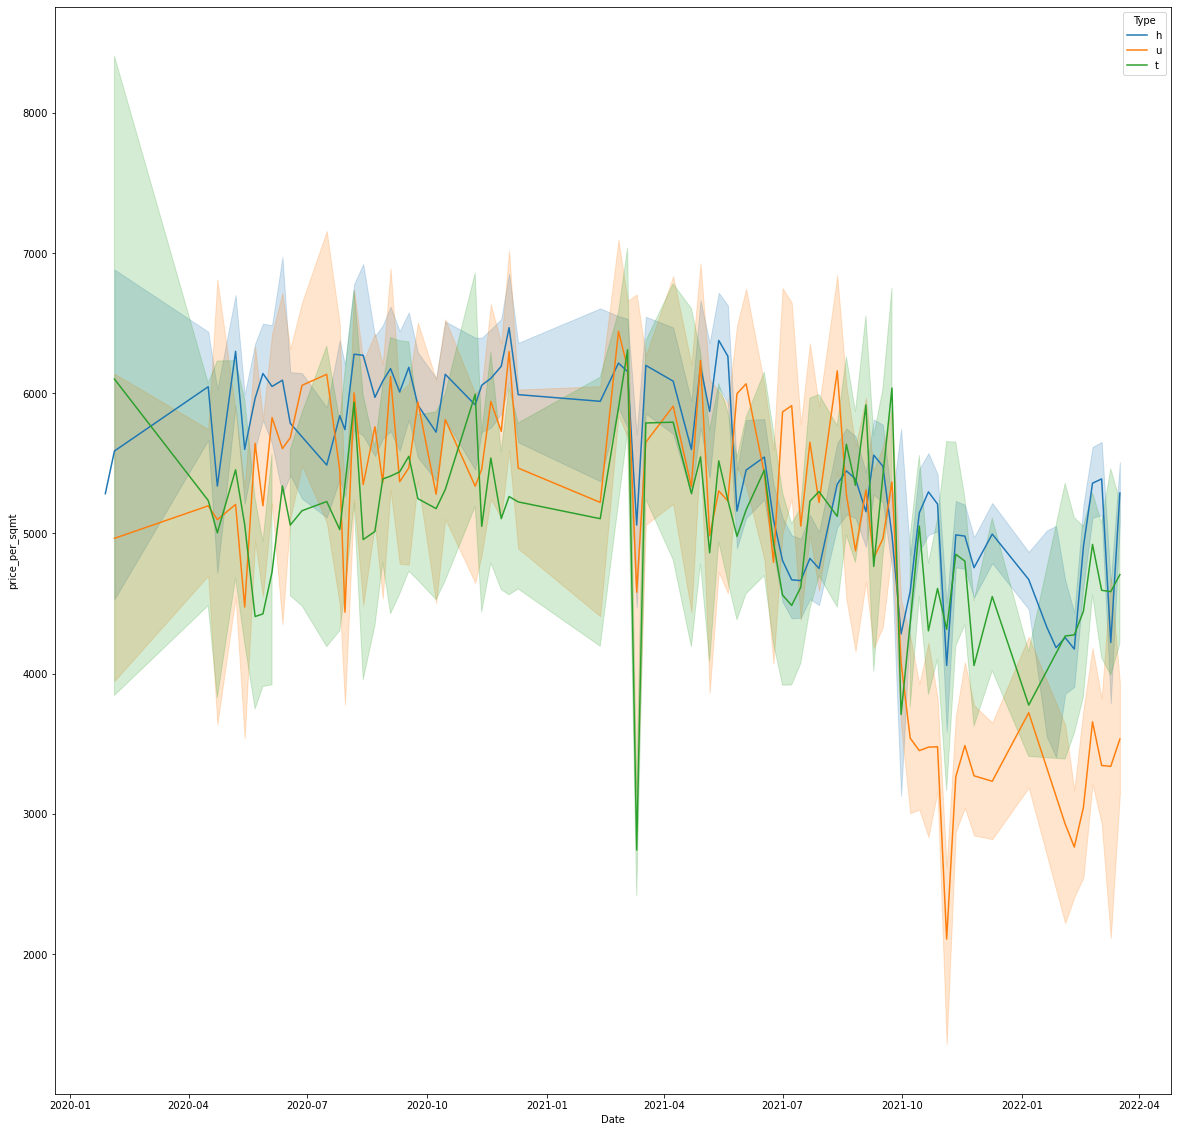

In [80]:
sns.lineplot(data=df6, x='Date', y='price_per_sqmt', hue='Type')
#unit/duplex prices has greater change and more vulnerable during market downturn
#house prices has least volatility among the three 

In [81]:
df6.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'Date', 'Bedroom',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Regionname', 'price_per_sqmt', 'Year_Month'],
      dtype='object')

In [82]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17691 entries, 0 to 17708
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Suburb          17691 non-null  object        
 1   Rooms           17691 non-null  int64         
 2   Type            17691 non-null  object        
 3   Price           17691 non-null  float64       
 4   Method          17691 non-null  object        
 5   Date            17691 non-null  datetime64[ns]
 6   Bedroom         17691 non-null  int64         
 7   Bathroom        17691 non-null  float64       
 8   Car             17691 non-null  float64       
 9   Landsize        17691 non-null  float64       
 10  BuildingArea    17691 non-null  float64       
 11  YearBuilt       17691 non-null  float64       
 12  CouncilArea     17691 non-null  object        
 13  Regionname      17691 non-null  object        
 14  price_per_sqmt  17691 non-null  float64       
 15  Ye

In [83]:
#drop 'Date', 'Method', 'Year_Month', 'CouncilArea' and 'Regionname' columns
#one-hot encoding on 'Suburb' and 'Type'
df7 = df6.drop(['Date','Method', 'CouncilArea', 'Regionname', 'Year_Month'], axis='columns')
df7.head()

Suburb  Rooms Type      Price  Bedroom  Bathroom  Car  Landsize  \
0  Abbotsford      2    h  1035000.0        2       1.0  0.0     156.0   
1  Abbotsford      2    h   700000.0        1       1.0  1.0     387.0   
2  Abbotsford      3    h  1876000.0        2       2.0  2.0     277.0   
3  Abbotsford      2    h   941000.0        3       1.0  2.0     635.0   
4  Abbotsford      1    u   441000.0        3       3.0  1.0     510.0   

   BuildingArea  YearBuilt  price_per_sqmt  
0      79.00000     1986.0    13101.265823  
1     286.00000     2018.0     2447.552448  
2     210.00000     2012.0     8933.333333  
3     171.90411     2010.0     5473.981991  
4     171.90411     2015.0     2565.383696

In [84]:
dumies_1 = pd.get_dummies(df7.Suburb)
dumies_1.head()

Abbotsford  Aberfeldie  Airport West  Albert Park  Albion  Alphington  \
0           1           0             0            0       0           0   
1           1           0             0            0       0           0   
2           1           0             0            0       0           0   
3           1           0             0            0       0           0   
4           1           0             0            0       0           0   

   Altona  Altona Meadows  Altona North  Ardeer  ...  Westmeadows  \
0       0               0             0       0  ...            0   
1       0               0             0       0  ...            0   
2       0               0             0       0  ...            0   
3       0               0             0       0  ...            0   
4       0               0             0       0  ...            0   

   Wheelers Hill  Williamstown  Williamstown North  Windsor  Wollert  \
0              0             0                   0        0        0   
1              0             0                   0        0        0   
2              0             0                   0        0        0   
3              0             0                   0        0        0   
4              0             0                   0        0        0   

   Wyndham Vale  Yallambie  Yarraville  other_suburbs  
0             0          0           0              0  
1             0          0           0              0  
2             0          0           0              0  
3             0          0           0              0  
4             0          0           0              0  

[5 rows x 272 columns]

In [85]:
#drop other_suburbs dummy col to avoid a dummy variable drag
df8 = pd.concat([df7,dumies_1.drop('other_suburbs',axis='columns')],axis='columns')
df8.head( )

Suburb  Rooms Type      Price  Bedroom  Bathroom  Car  Landsize  \
0  Abbotsford      2    h  1035000.0        2       1.0  0.0     156.0   
1  Abbotsford      2    h   700000.0        1       1.0  1.0     387.0   
2  Abbotsford      3    h  1876000.0        2       2.0  2.0     277.0   
3  Abbotsford      2    h   941000.0        3       1.0  2.0     635.0   
4  Abbotsford      1    u   441000.0        3       3.0  1.0     510.0   

   BuildingArea  YearBuilt  ...  West Melbourne  Westmeadows  Wheelers Hill  \
0      79.00000     1986.0  ...               0            0              0   
1     286.00000     2018.0  ...               0            0              0   
2     210.00000     2012.0  ...               0            0              0   
3     171.90411     2010.0  ...               0            0              0   
4     171.90411     2015.0  ...               0            0              0   

   Williamstown  Williamstown North  Windsor  Wollert  Wyndham Vale  \
0             0                   0        0        0             0   
1             0                   0        0        0             0   
2             0                   0        0        0             0   
3             0                   0        0        0             0   
4             0                   0        0        0             0   

   Yallambie  Yarraville  
0          0           0  
1          0           0  
2          0           0  
3          0           0  
4          0           0  

[5 rows x 282 columns]

In [86]:
dumies_2 = pd.get_dummies(df8.Type)
dumies_2.head()

h  t  u
0  1  0  0
1  1  0  0
2  1  0  0
3  1  0  0
4  0  0  1

In [87]:
df9 = pd.concat([df8,dumies_2],axis='columns')
df9.head()

Suburb  Rooms Type      Price  Bedroom  Bathroom  Car  Landsize  \
0  Abbotsford      2    h  1035000.0        2       1.0  0.0     156.0   
1  Abbotsford      2    h   700000.0        1       1.0  1.0     387.0   
2  Abbotsford      3    h  1876000.0        2       2.0  2.0     277.0   
3  Abbotsford      2    h   941000.0        3       1.0  2.0     635.0   
4  Abbotsford      1    u   441000.0        3       3.0  1.0     510.0   

   BuildingArea  YearBuilt  ...  Williamstown  Williamstown North  Windsor  \
0      79.00000     1986.0  ...             0                   0        0   
1     286.00000     2018.0  ...             0                   0        0   
2     210.00000     2012.0  ...             0                   0        0   
3     171.90411     2010.0  ...             0                   0        0   
4     171.90411     2015.0  ...             0                   0        0   

   Wollert  Wyndham Vale  Yallambie  Yarraville  h  t  u  
0        0             0          0           0  1  0  0  
1        0             0          0           0  1  0  0  
2        0             0          0           0  1  0  0  
3        0             0          0           0  1  0  0  
4        0             0          0           0  0  0  1  

[5 rows x 285 columns]

In [88]:
#drop suburb and type columns
df10 = df9.drop(['Suburb','Type','price_per_sqmt'],axis='columns')
df10.head()

Rooms      Price  Bedroom  Bathroom  Car  Landsize  BuildingArea  \
0      2  1035000.0        2       1.0  0.0     156.0      79.00000   
1      2   700000.0        1       1.0  1.0     387.0     286.00000   
2      3  1876000.0        2       2.0  2.0     277.0     210.00000   
3      2   941000.0        3       1.0  2.0     635.0     171.90411   
4      1   441000.0        3       3.0  1.0     510.0     171.90411   

   YearBuilt  Abbotsford  Aberfeldie  ...  Williamstown  Williamstown North  \
0     1986.0           1           0  ...             0                   0   
1     2018.0           1           0  ...             0                   0   
2     2012.0           1           0  ...             0                   0   
3     2010.0           1           0  ...             0                   0   
4     2015.0           1           0  ...             0                   0   

   Windsor  Wollert  Wyndham Vale  Yallambie  Yarraville  h  t  u  
0        0        0             0          0           0  1  0  0  
1        0        0             0          0           0  1  0  0  
2        0        0             0          0           0  1  0  0  
3        0        0             0          0           0  1  0  0  
4        0        0             0          0           0  0  0  1  

[5 rows x 282 columns]

In [89]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17691 entries, 0 to 17708
Columns: 282 entries, Rooms to u
dtypes: float64(6), int64(2), uint8(274)
memory usage: 5.8 MB


In [90]:
df10.shape

(17691, 282)

In [91]:
X = df10.drop('Price', axis='columns')

In [92]:
y = df10.Price

In [93]:
# split data to training and testing data to 80:20 ratio; shuffle 10 times before split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [94]:
X_train

Rooms  Bedroom  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
1988       3        3       2.0  2.0     301.0    243.827276     2000.0   
4275       5        5       4.0  2.0     554.0    312.000000     2017.0   
8565       3        3       1.0  2.0     429.0    109.000000     1974.0   
13434      3        3       1.0  5.0    4679.0    170.000000     2010.0   
4344       3        3       2.0  2.0     380.0    262.000000     1998.0   
...      ...      ...       ...  ...       ...           ...        ...   
10211      3        3       2.0  2.0     225.0    219.044493     2017.0   
9382       3        3       3.0  1.0     327.0    249.000000     2005.0   
7299       5        5       3.0  4.0     619.0    327.000000     2000.0   
7301       3        3       2.0  2.0     217.0    163.000000     1988.0   
17691      3        3       2.0  2.0     438.0    315.000000     1994.0   

       Abbotsford  Aberfeldie  Airport West  ...  Williamstown  \
1988            0           0             0  ...             0   
4275            0           0             0  ...             0   
8565            0           0             0  ...             0   
13434           0           0             0  ...             0   
4344            0           0             0  ...             0   
...           ...         ...           ...  ...           ...   
10211           0           0             0  ...             0   
9382            0           0             0  ...             0   
7299            0           0             0  ...             0   
7301            0           0             0  ...             0   
17691           0           0             0  ...             0   

       Williamstown North  Windsor  Wollert  Wyndham Vale  Yallambie  \
1988                    0        0        0             0          0   
4275                    0        0        0             0          0   
8565                    0        0        0             0          0   
13434                   0        0        0             0          0   
4344                    0        0        0             0          0   
...                   ...      ...      ...           ...        ...   
10211                   0        0        0             0          0   
9382                    0        0        0             0          0   
7299                    0        0        0             0          0   
7301                    0        0        0             0          0   
17691                   0        0        0             0          0   

       Yarraville  h  t  u  
1988            0  0  1  0  
4275            0  1  0  0  
8565            0  1  0  0  
13434           0  1  0  0  
4344            0  1  0  0  
...           ... .. .. ..  
10211           0  1  0  0  
9382            0  1  0  0  
7299            0  1  0  0  
7301            0  1  0  0  
17691           0  0  1  0  

[14152 rows x 281 columns]

In [95]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [96]:
#train the linear regression model
lr.fit(X_train,y_train)

LinearRegression()

In [97]:
lr.score(X_test,y_test)
#decent result on linear regression model

0.7618776851969136

In [98]:
# Run k-fold cross validation 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
#5-fold
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=None)

In [99]:
cross_val_score(LinearRegression(),X,y,cv=cv)
# all of them are above 0.90 which are decent scores

array([0.77477504, 0.75972263, 0.75287796, 0.76151999, 0.75884272])

In [100]:
# use grid search to check other model results on these data
from sklearn.model_selection import GridSearchCV

In [101]:
# pick Lasso and Decision tree regression to test
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [102]:
# create a dic of models and praram options
models_configs = {'linear_regression':{'model':LinearRegression(),
                                     'params':{'normalize':[True, False]}},
                'lasso':{'model':Lasso(tol=1),
                        'params':{'alpha':[1.0,2.0],
                                 'selection':['random','cyclic']}},
                 'decision_tree_re':{'model':DecisionTreeRegressor(),
                                    'params':{'criterion':['mse','friedman_mse'],
                                             'splitter':['best','random']}}
                }

In [103]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print("\n")
    print("Model: "+ str(model))
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [104]:
for model, config in models_configs.items():
    grid_models = GridSearchCV(config['model'],config['params'],cv=5)
    grid_models.fit(X_train, y_train)
    print_grid_search_metrics(grid_models)



Model: linear_regression
Best score: 0.7594872771725072
Best parameters set:
normalize:False


Model: lasso
Best score: 0.744488853703332
Best parameters set:
alpha:1.0
selection:cyclic


Model: decision_tree_re
Best score: 0.5687121849582656
Best parameters set:
criterion:friedman_mse
splitter:random


In [105]:
#linear regression has best score with criterion:mse, splitter:best
#use linear regression model to predict prices

In [131]:
X.columns

Index(['Rooms', 'Bedroom', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Abbotsford', 'Aberfeldie', 'Airport West',
       ...
       'Williamstown', 'Williamstown North', 'Windsor', 'Wollert',
       'Wyndham Vale', 'Yallambie', 'Yarraville', 'h', 't', 'u'],
      dtype='object', length=281)

In [107]:
np.where(X.columns=='Abbotsford')

(array([7]),)

In [108]:
np.where(X.columns=='Abbotsford')[0]

array([7])

In [109]:
np.where(X.columns=='Abbotsford')[0][0]

7

In [110]:
def predict_price (Rooms, Bedroom, Bathroom, Car, Landsize, BuildingArea, YearBuilt, Suburb, Type):
    Suburb_index = np.where(X.columns==Suburb)[0][0]
    Type_index = np.where(X.columns==Type)[0][0]
    x = np.zeros(len(X.columns))
    x[0]=Rooms
    x[1]=Bedroom
    x[2]=Bathroom
    x[3]=Car
    x[4]=Landsize
    x[5]=BuildingArea
    x[6]=YearBuilt
    if Suburb_index >= 0:
        x[Suburb_index] = 1
    if Type_index >= 0:
        x[Type_index] = 1
    return lr.predict([x])[0]

In [114]:
predict_price(3,3,2,1,333,260,2000,'Abbotsford','h')

1424837.6810539695

In [117]:
predict_price(2,3,2,2,330,260,2000,'Abbotsford','h')
# note number of rooms has greater weight than Carport size/capacity on price prediction.

1318403.2446391406

In [128]:
# Check feature importance 
# get coefficients of each feature
importance = lr.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.2f' % (i,v))
#note some suburbs areas have highest coefficient; 
#it means the area which the property located at has greater influence on the property value 

Feature: 0, Score: 131247.72
Feature: 1, Score: 16317.95
Feature: 2, Score: 50181.04
Feature: 3, Score: 24821.25
Feature: 4, Score: 2.66
Feature: 5, Score: 2034.63
Feature: 6, Score: -941.88
Feature: 7, Score: 659730.87
Feature: 8, Score: 659328.67
Feature: 9, Score: 186589.23
Feature: 10, Score: 1433458.89
Feature: 11, Score: 199059.09
Feature: 12, Score: 768044.60
Feature: 13, Score: 353227.62
Feature: 14, Score: 20140.00
Feature: 15, Score: 86292.93
Feature: 16, Score: 36645.78
Feature: 17, Score: 1102217.07
Feature: 18, Score: 518297.48
Feature: 19, Score: 901519.90
Feature: 20, Score: 474676.48
Feature: 21, Score: 291984.69
Feature: 22, Score: 248484.93
Feature: 23, Score: -187200.65
Feature: 24, Score: 102444.26
Feature: 25, Score: 537619.77
Feature: 26, Score: 1108010.82
Feature: 27, Score: 939556.80
Feature: 28, Score: 161322.61
Feature: 29, Score: -50779.83
Feature: 30, Score: 736341.16
Feature: 31, Score: 362253.21
Feature: 32, Score: 629381.02
Feature: 33, Score: 449683.54
F